In [ ]:
from transformers import pipeline
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import LsiModel
from collections import Counter






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df = pd.read_csv("clean.csv")

In [ ]:
mod = pipeline("sentiment-analysis")
df['Sentiment'] = df['Review'].apply(lambda x: mod(x)[0]['label'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df

,Unnamed: 0,Reviewer,Location,Review,Date,Rating,Sentiment
0,2,Lori,Atlantic Canada,My fave restaurant downtown. Cannot beat the B...,December 7 2024,5,POSITIVE
1,3,Mark,Ottawa,"A great waterfront dining experience! Food, se...",December 7 2024,5,POSITIVE
2,4,OpenTable Diner,New York City,We enjoyed dinner. Pizza burgers were great a...,December 5 2024,5,POSITIVE
3,5,Sally,Atlantic Canada,"We had a wonderful night!! Fantastic food, ama...",December 5 2024,5,POSITIVE
4,6,Colin,Atlantic Canada,Fantastic food. Attentive staff. Great experie...,December 5 2024,5,POSITIVE
...,...,...,...,...,...,...,...
1051,1053,DebbieS,Atlantic Canada,Had a nice seat by the fire. We Like the casua...,February 8 2023,5,POSITIVE
1052,1054,JoanneP,Atlantic Canada,Service was confusing. but this is prelaunch. ...,February 4 2023,4,POSITIVE
1053,1055,ARDENTTRAVELER,New York City,Great service and food was awesome limited me...,February 3 2023,5,POSITIVE
1054,1056,SarahR,Atlantic Canada,"Only the tasting menu was out, but it seemed w...",February 3 2023,5,POSITIVE


In [ ]:
data=df.iloc[2:]
data['Date'] = data['Date'].str.replace(',','')

<ipython-input-193-ad74e69360a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].str.replace(',','')


In [ ]:
data

,Unnamed: 0,Reviewer,Location,Review,Date,Rating,Sentiment
2,4,OpenTable Diner,New York City,We enjoyed dinner. Pizza burgers were great a...,December 5 2024,5,POSITIVE
3,5,Sally,Atlantic Canada,"We had a wonderful night!! Fantastic food, ama...",December 5 2024,5,POSITIVE
4,6,Colin,Atlantic Canada,Fantastic food. Attentive staff. Great experie...,December 5 2024,5,POSITIVE
5,7,Lyndsay,Atlantic Canada,We had an amazing experience at Salt Ash! Boo...,December 4 2024,5,POSITIVE
6,8,Elizabeth,Montreal,Weve been to Salt Ash in the past and have en...,December 1 2024,4,NEGATIVE
...,...,...,...,...,...,...,...
1051,1053,DebbieS,Atlantic Canada,Had a nice seat by the fire. We Like the casua...,February 8 2023,5,POSITIVE
1052,1054,JoanneP,Atlantic Canada,Service was confusing. but this is prelaunch. ...,February 4 2023,4,POSITIVE
1053,1055,ARDENTTRAVELER,New York City,Great service and food was awesome limited me...,February 3 2023,5,POSITIVE
1054,1056,SarahR,Atlantic Canada,"Only the tasting menu was out, but it seemed w...",February 3 2023,5,POSITIVE


In [ ]:
data.to_csv("RevSentiments.csv")

In [ ]:
Negative = data[data['Sentiment']=="NEGATIVE"]

In [ ]:
s = Negative[Negative['Review'].str.contains("bill")]

In [ ]:
s

,Unnamed: 0,Reviewer,Location,Review,Date,Rating,Sentiment
6,8,Elizabeth,Montreal,Weve been to Salt Ash in the past and have en...,December 1 2024,4,NEGATIVE
51,53,Peggy,Atlantic Canada,We had heard so much about salt and ash and wa...,September 28 2024,4,NEGATIVE
96,98,W,Atlantic Canada,"The food was amazing, but overpriced. On the w...",August 17 2024,5,NEGATIVE
215,217,OpenTable Diner,Atlantic Canada,"Poor food selection, fries with everything. T...",May 17 2024,1,NEGATIVE
267,269,RachelM,Toronto,Ive been here three times and the first time w...,March 2 2024,5,NEGATIVE
282,284,RebeccaB,Atlantic Canada,Ive been here a few times now but this last ex...,February 23 2024,4,NEGATIVE
393,395,KatieW,Atlantic Canada,Really pretty space but the service was relati...,December 17 2023,4,NEGATIVE
436,438,Zegan,Atlantic Canada,Our waitress woman with French accent was awfu...,November 26 2023,4,NEGATIVE
523,525,LMD37,Atlantic Canada,So many different waiterswaitresses waiting on...,October 15 2023,4,NEGATIVE
557,559,RabeaT,Toronto,I booked this place thinking it was an upscale...,September 26 2023,3,NEGATIVE


In [ ]:
Negative

,Unnamed: 0,Reviewer,Location,Review,Date,Rating,Sentiment
6,8,Elizabeth,Montreal,Weve been to Salt Ash in the past and have en...,December 1 2024,4,NEGATIVE
8,10,Keith,Manitoba,Menu changed for the worse. Service was poor. ...,November 27 2024,2,NEGATIVE
10,12,Zoey,Calgary,Our server was fantastic and even gave us trav...,November 22 2024,3,NEGATIVE
21,23,Sharon,Toronto,"Food was fantastic, once we got it ! . Our ser...",October 29 2024,3,NEGATIVE
23,25,Matt,Vancouver,Good service. Nice atmosphere and location. Fo...,October 26 2024,4,NEGATIVE
...,...,...,...,...,...,...,...
1025,1027,Jennifer,Atlantic Canada,"Everything was great, the service, the food, t...",February 15 2023,5,NEGATIVE
1026,1028,EastcoastK,Atlantic Canada,environment is perfect had two mains and an a...,February 15 2023,5,NEGATIVE
1028,1030,JohnG,Calgary,Service was a bit rushed. Pizza arrived before...,February 15 2023,4,NEGATIVE
1036,1038,BradM,Atlantic Canada,The waitstaff was really green and inexperienc...,February 12 2023,4,NEGATIVE


In [ ]:
l= df[df['Review'].str.contains("happy hour")]

In [ ]:
l

,Unnamed: 0,Reviewer,Location,Review,Date,Rating,Sentiment
181,183,OpenTable Diner,Atlantic Canada,The vibes are immaculate and the happy hour is...,June 15 2024,5,POSITIVE
228,230,OpenTable Diner,Atlantic Canada,Service was amazing! Our gal was so pleasant a...,May 5 2024,5,POSITIVE
250,252,OpenTable Diner,Atlantic Canada,We were seated at 2pm which I chose specifical...,April 6 2024,3,NEGATIVE
617,619,LBroad162,Atlantic Canada,I was so excited to try Salt and Ash I was sa...,August 30 2023,4,NEGATIVE
670,672,OpenTable Diner,Atlantic Canada,I was at your establishment this evening to en...,August 5 2023,5,NEGATIVE
710,712,PeachyKeen,Atlantic Canada,I went up to the bar after my group and I were...,July 20 2023,5,POSITIVE
959,961,ClaireJ,Atlantic Canada,Loved our experience and appreciate the fair p...,March 24 2023,5,POSITIVE


In [ ]:
n= df[df['Location'].str.contains("Atlantic Canada")]

In [ ]:
n

,Unnamed: 0,Reviewer,Location,Review,Date,Rating,Sentiment
0,2,Lori,Atlantic Canada,My fave restaurant downtown. Cannot beat the B...,December 7 2024,5,POSITIVE
3,5,Sally,Atlantic Canada,"We had a wonderful night!! Fantastic food, ama...",December 5 2024,5,POSITIVE
4,6,Colin,Atlantic Canada,Fantastic food. Attentive staff. Great experie...,December 5 2024,5,POSITIVE
5,7,Lyndsay,Atlantic Canada,We had an amazing experience at Salt Ash! Boo...,December 4 2024,5,POSITIVE
11,13,Stephanie,Atlantic Canada,Love this spot! Great energy and food. Been se...,November 21 2024,5,POSITIVE
...,...,...,...,...,...,...,...
1049,1051,OpenTable Diner,Atlantic Canada,Overall was good. the meals were okay but serv...,February 8 2023,4,POSITIVE
1051,1053,DebbieS,Atlantic Canada,Had a nice seat by the fire. We Like the casua...,February 8 2023,5,POSITIVE
1052,1054,JoanneP,Atlantic Canada,Service was confusing. but this is prelaunch. ...,February 4 2023,4,POSITIVE
1054,1056,SarahR,Atlantic Canada,"Only the tasting menu was out, but it seemed w...",February 3 2023,5,POSITIVE


In [ ]:
corpus = Negative["Review"]
# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))

exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

In [ ]:
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [ ]:
lsi = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Results
lsi.print_topics(num_topics=3, num_words=5)



[(0,
  '0.400*"food" + 0.249*"server" + 0.246*"service" + 0.193*"time" + 0.189*"table"'),
 (1,
  '-0.313*"server" + 0.296*"menu" + 0.239*"restaurant" + -0.224*"u" + 0.186*"would"'),
 (2,
  '-0.344*"food" + 0.305*"laura" + 0.272*"happy" + 0.259*"hour" + 0.235*"bill"')]

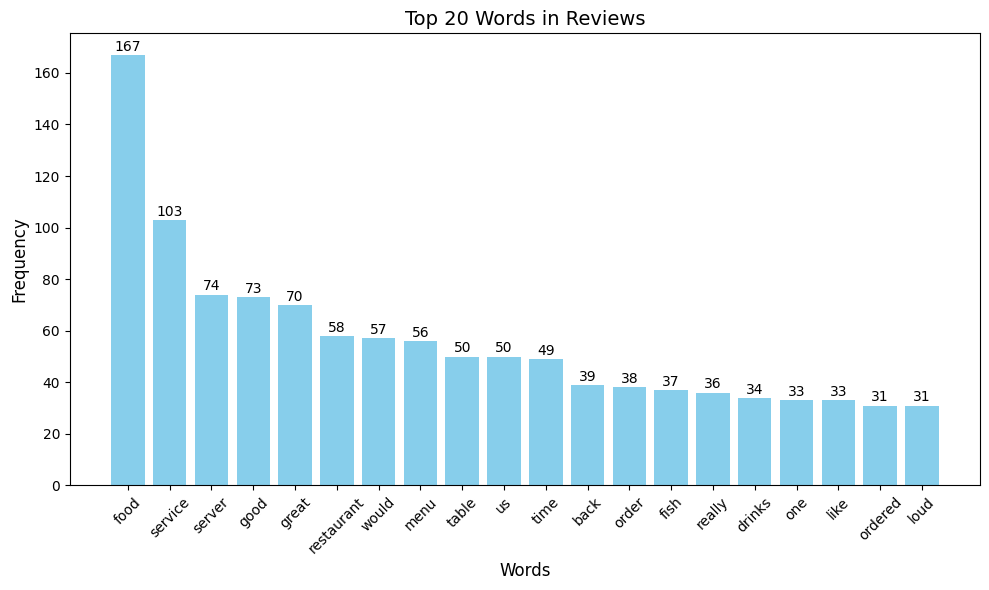

In [ ]:
def clean_and_tokenize(doc):
    doc = doc.lower()  # Convert to lowercase
    words = doc.split()  # Tokenize into words
    words = [word.strip(string.punctuation) for word in words]  # Remove punctuation
    words = [word for word in words if word not in stop and word]  # Remove stopwords
    return words

# Clean and tokenize all reviews
all_words = []
for review in corpus:
    all_words.extend(clean_and_tokenize(review))

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 20 words
top_20_words = word_counts.most_common(20)

# Display the results
words, counts = zip(*top_20_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color='skyblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Words in Reviews', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        yval + 0.5,                        # y-coordinate (slightly above the bar)
        f'{int(yval)}',                    # Frequency value
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10                        # Font size
    )
plt.tight_layout()
plt.show()